In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [38]:
import numpy
import matplotlib.pyplot as plt

### Лекция 2 - гамма коррекция

Гамма коррекция приминяется для регулирования яркости изображения. Засчёт нелинейности преобразования, при регулировании яркости могут стать видны мелкие детали. Гамма коррекция применяется при обработке изображений, а также, ввиду технических особенностей, для компенсации яркости при воспроизведении изображения на дисплеях. Ниже приведены примеры гамма коррекции, а также функции преобразования

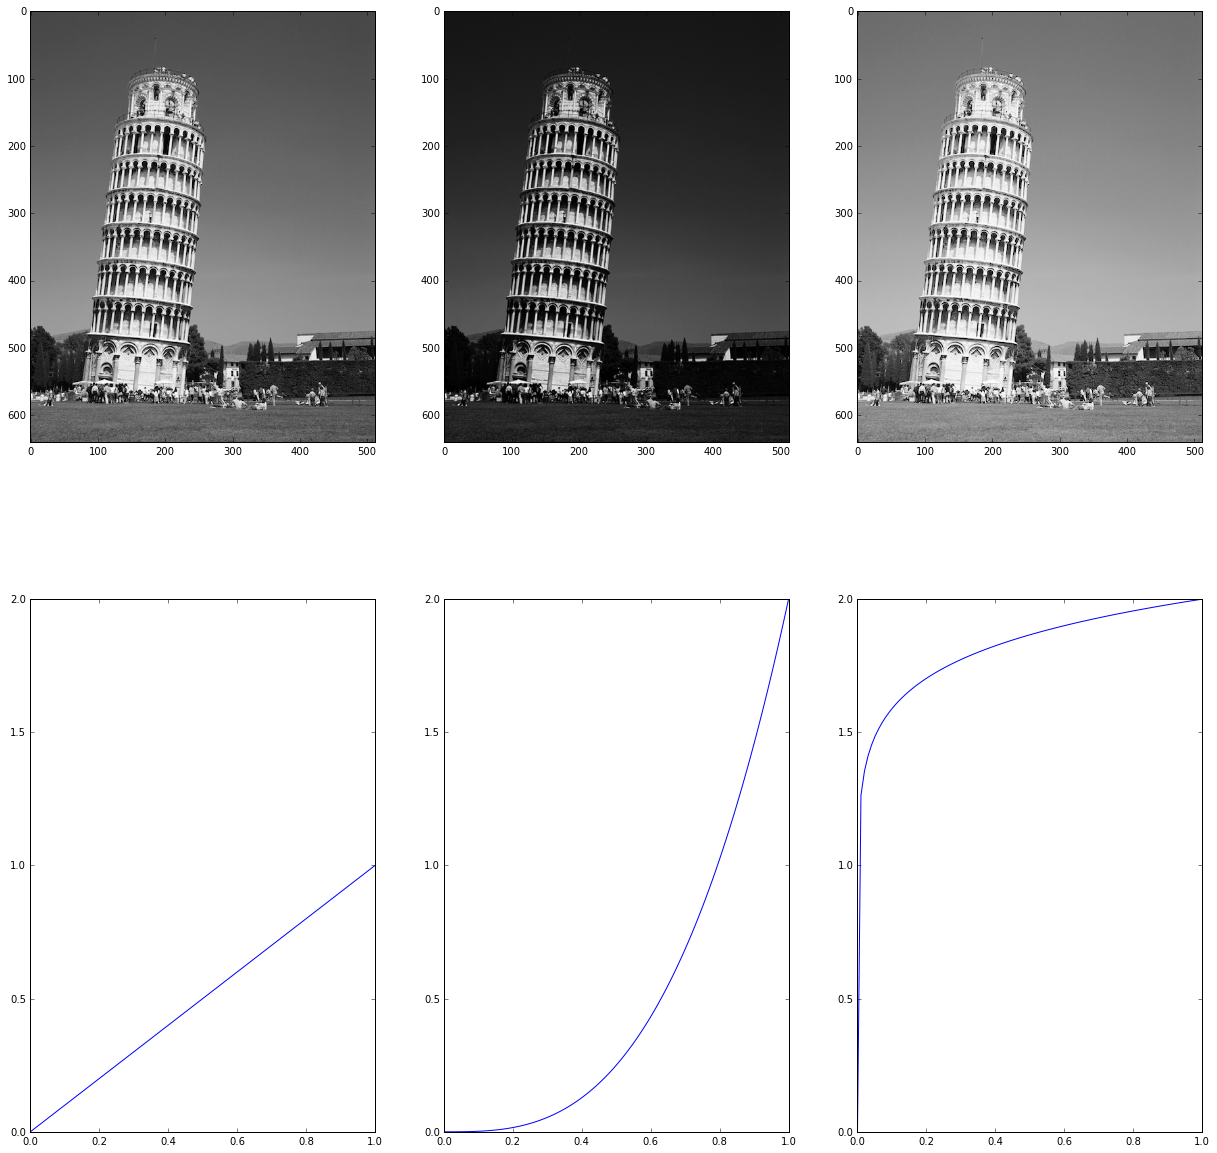

In [97]:
figsize(21,21)
fig = plt.figure()
plt.subplot(231)
im = imread('5/tower.png').sum(axis=2)
imshow(im, cmap=plt.get_cmap('gray'))
plt.subplot(232)
im = 2*imread('5/tower.png').sum(axis=2)**3
imshow(im, cmap=plt.get_cmap('gray'))
plt.subplot(233)
im = 2*imread('5/tower.png').sum(axis=2)**(0.1)
imshow(im, cmap=plt.get_cmap('gray'))

x = np.linspace(0,1,100)
plt.subplot(234)
plt.xlim(0,1)
plt.ylim(0,2)
plt.plot(x,x)
plt.subplot(235)
plt.xlim(0,1)
plt.ylim(0,2)
plt.plot(x,2*x**3)
plt.subplot(236)
plt.xlim(0,1)
plt.ylim(0,2)
plt.plot(x,2*x**0.1)

### Лекция 5 - выпуклая оболочка

Простой "обёрточный" алгоритм для построения выпуклой оболочки:
- Находим самую левую точку (очевидно, она будет принадлежать выпуклой оболочке)
- определяем текущее ребро выпуклой оболочки (сначала это вертикаль)
- для всех точек из множества считаем угол с направлением ребра и выбираем точку с минимальным углом
- таким образом получили следующую точку выпуклого множества
- заканчиваем итерации, когда встретили первую точку из выпуклого множества

Сложность, очевидно, $O(n^2)$

Для реализации алгоритма необходимо точно вычислять углы между прямыми. Возможно появление вырожденных случаев, когда несколько точек лежат на одной прямой.

Ниже приведена имплементация. С сортировками и переборами я не заморачивался, т.к. асимптотики это не меняет.

In [77]:
def find_leftmost_point(points):
    leftmost = points[0]
    for point in points:
        if point[0] < leftmost[0]:
            leftmost = point
    return leftmost

def angle(vec1, vec2):
    norm1 = np.sqrt(np.dot(vec1,vec1.T))
    norm2 = np.sqrt(np.dot(vec2,vec2.T))
    if norm1 == 0. or norm2 == 0.:
        return np.inf
    cos = np.dot(vec1,vec2.T) / norm1 / norm2 
    if cos < -1.:
        cos = -1.
    if cos > 1.:
        cos = 1.
    return np.arccos(cos)

def giftWrapping_algo(points):
    hull = [find_leftmost_point(points)]
    cur_leg = np.array([0,1])
    while True:
        min_angle = 180.0
        candidate = np.zeros(2)
        for p in points:
            cur_angle = angle(cur_leg, p - hull[-1:])
            if cur_angle < min_angle:
                min_angle = cur_angle
                candidate = p
        if reduce(lambda a,b: a and b, candidate == hull[0]):
            break
        hull.append(candidate)
        cur_leg = hull[-1:][0] - hull[-2:-1][0]
    hull.append(hull[0])
    return np.array(hull)

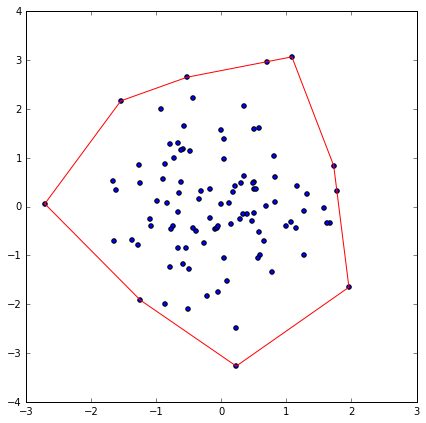

In [88]:
figsize(7,7)
points = np.random.normal(size=[100,2])
hull = giftWrapping_algo(points)
plt.scatter(points.T[0], points.T[1])
plt.plot(hull.T[0], hull.T[1], c='r')